In [33]:
import pandas as pd
import numpy as np

In [34]:
Data_Path = input("enter your data path")

enter your data path/content/benchmark_results.csv


In [35]:
data = pd.read_csv(Data_Path)

In [36]:
data

,engine,best_algorithm,test_MAE,test_MAPE,time_budget,fitting_duration,training_duration,dataset_id
0,Benchmark,HistGradientBoostingRegressor(l2_regularizatio...,1.260865,61.037864,10,9.994470,10.408626,1
1,MetaModel1,AdaBoostRegressor(estimator={'Type': 'Decision...,1.124078,54.416042,10,0.292736,14.280830,1
2,MetaModel2,"Pipeline(steps=[('stackingestimator',\n ...",1.769981,85.683907,10,10.121055,10.217346,1
3,Benchmark,"ExtraTreesRegressor(bootstrap=True, criterion=...",0.005913,20.377802,10,9.916750,12.026096,2
4,MetaModel1,RandomForestRegressor(max_depth=10),0.003278,11.298063,10,0.376253,25.149649,2
...,...,...,...,...,...,...,...,...
88,MetaModel1,AdaBoostRegressor(estimator={'Type': 'Decision...,2986.782518,66.311067,10,0.003147,12.102953,30
89,MetaModel2,"Pipeline(steps=[('rbfsampler',\n ...",4021.792586,89.289848,10,10.133454,10.147934,30
90,Benchmark,"SGDRegressor(alpha=0.0006517033225329654, epsi...",105.879889,75.292331,10,10.046632,10.060279,31
91,MetaModel1,"ElasticNet(alpha=0.009999996179576642, l1_rati...",32.170029,22.876455,10,0.000062,12.086330,31


## Determine wether the data is parametric or not:



### Shapiro-Wilk Test and Visual Normality Check for MAE and MAPE:
- most of the data is not normaly distrbuted except MetaModel1 MAPE, it would be more appropriate to use non-parametric tests for analysis.
- while (p-value > 0.05) → The data is normally distributed.



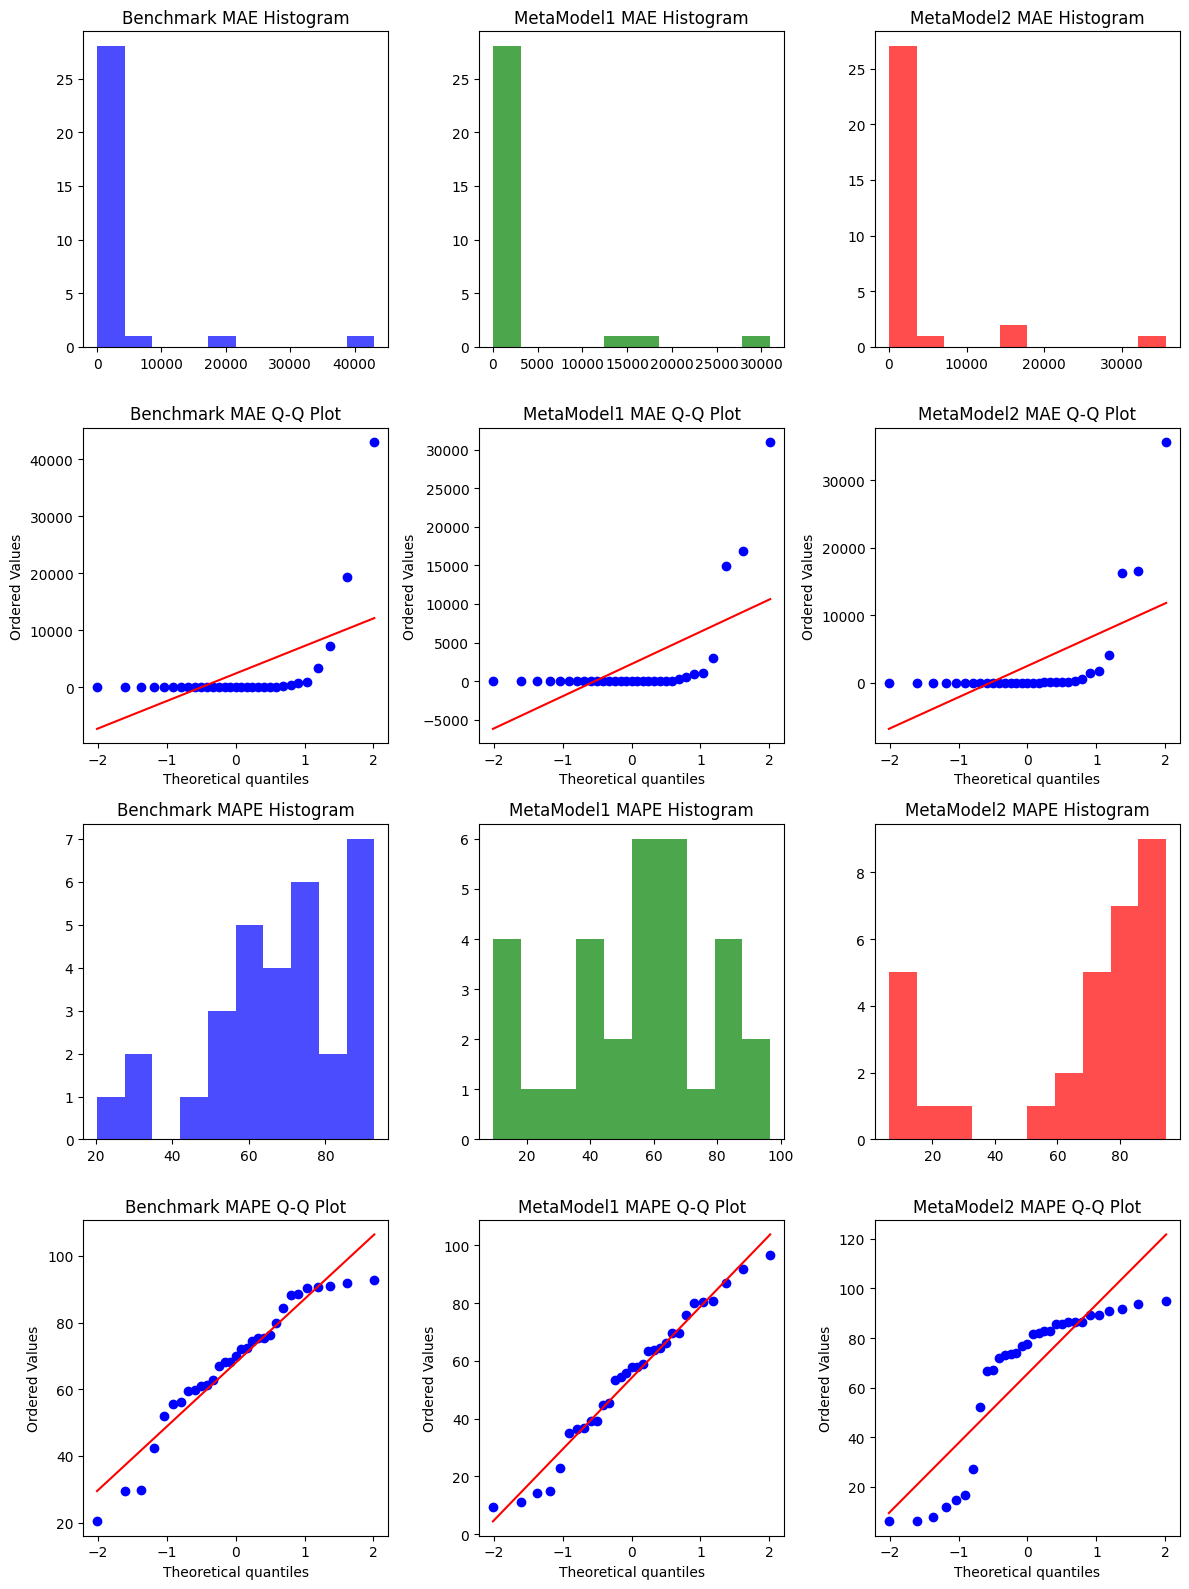


    Shapiro-Wilk Benchmark MAE: ShapiroResult(statistic=0.33384058980439413, pvalue=9.099016943054346e-11)
    Shapiro-Wilk Benchmark MAPE: ShapiroResult(statistic=0.9264893323415805, pvalue=0.0352168791627427)

    Shapiro-Wilk MetaModel1 MAE: ShapiroResult(statistic=0.3874851867784701, pvalue=2.7897112446532913e-10)
    Shapiro-Wilk MetaModel1 MAPE: ShapiroResult(statistic=0.9658750436773317, pvalue=0.4132795012219312)

    Shapiro-Wilk MetaModel2 MAE: ShapiroResult(statistic=0.387987831853677, pvalue=2.820029759526276e-10)
    Shapiro-Wilk MetaModel2 MAPE: ShapiroResult(statistic=0.7674969477753493, pvalue=1.3651417642626288e-05)


In [37]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pivot the data for MAE and MAPE values
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Step 1: Visual check for normality using histograms and Q-Q plots for both MAE and MAPE

fig, axes = plt.subplots(4, 3, figsize=(12, 16))  # Creating a grid for 6 plots (3 for MAE, 3 for MAPE)

# MAE Plots
# Plot histogram and Q-Q plot for Benchmark MAE
axes[0, 0].hist(pivoted_mae_data['Benchmark'], bins=10, alpha=0.7, color='blue')
axes[0, 0].set_title('Benchmark MAE Histogram')
stats.probplot(pivoted_mae_data['Benchmark'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Benchmark MAE Q-Q Plot')

# Plot histogram and Q-Q plot for MetaModel1 MAE
axes[0, 1].hist(pivoted_mae_data['MetaModel1'], bins=10, alpha=0.7, color='green')
axes[0, 1].set_title('MetaModel1 MAE Histogram')
stats.probplot(pivoted_mae_data['MetaModel1'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('MetaModel1 MAE Q-Q Plot')

# Plot histogram and Q-Q plot for MetaModel2 MAE
axes[0, 2].hist(pivoted_mae_data['MetaModel2'], bins=10, alpha=0.7, color='red')
axes[0, 2].set_title('MetaModel2 MAE Histogram')
stats.probplot(pivoted_mae_data['MetaModel2'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('MetaModel2 MAE Q-Q Plot')

# MAPE Plots
# Plot histogram and Q-Q plot for Benchmark MAPE
axes[2, 0].hist(pivoted_mape_data['Benchmark'], bins=10, alpha=0.7, color='blue')
axes[2, 0].set_title('Benchmark MAPE Histogram')
stats.probplot(pivoted_mape_data['Benchmark'], dist="norm", plot=axes[3, 0])
axes[3, 0].set_title('Benchmark MAPE Q-Q Plot')

# Plot histogram and Q-Q plot for MetaModel1 MAPE
axes[2, 1].hist(pivoted_mape_data['MetaModel1'], bins=10, alpha=0.7, color='green')
axes[2, 1].set_title('MetaModel1 MAPE Histogram')
stats.probplot(pivoted_mape_data['MetaModel1'], dist="norm", plot=axes[3, 1])
axes[3, 1].set_title('MetaModel1 MAPE Q-Q Plot')

# Plot histogram and Q-Q plot for MetaModel2 MAPE
axes[2, 2].hist(pivoted_mape_data['MetaModel2'], bins=10, alpha=0.7, color='red')
axes[2, 2].set_title('MetaModel2 MAPE Histogram')
stats.probplot(pivoted_mape_data['MetaModel2'], dist="norm", plot=axes[3, 2])
axes[3, 2].set_title('MetaModel2 MAPE Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk test for normality for each model's MAE and MAPE
shapiro_benchmark_mae = stats.shapiro(pivoted_mae_data['Benchmark'])
shapiro_metamodel1_mae = stats.shapiro(pivoted_mae_data['MetaModel1'])
shapiro_metamodel2_mae = stats.shapiro(pivoted_mae_data['MetaModel2'])

shapiro_benchmark_mape = stats.shapiro(pivoted_mape_data['Benchmark'])
shapiro_metamodel1_mape = stats.shapiro(pivoted_mape_data['MetaModel1'])
shapiro_metamodel2_mape = stats.shapiro(pivoted_mape_data['MetaModel2'])

print(f'''
    Shapiro-Wilk Benchmark MAE: {shapiro_benchmark_mae}
    Shapiro-Wilk Benchmark MAPE: {shapiro_benchmark_mape}

    Shapiro-Wilk MetaModel1 MAE: {shapiro_metamodel1_mae}
    Shapiro-Wilk MetaModel1 MAPE: {shapiro_metamodel1_mape}

    Shapiro-Wilk MetaModel2 MAE: {shapiro_metamodel2_mae}
    Shapiro-Wilk MetaModel2 MAPE: {shapiro_metamodel2_mape}'''
)


## 1. Run two statistical test that consider the three models together



### 1. Ordering data without magnitude of difference.


- Since the p-value < alpha (0.05), we can reject the null hypothesis that all three models perform similarly in rankings across the datasets.

#### Friedman Test

In [38]:
from scipy.stats import friedmanchisquare

# Pivot the data to get the MAE values for each model across all datasets
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')

# Perform the Friedman test for MAE across all datasets
friedman_test_mae = friedmanchisquare(pivoted_mae_data['Benchmark'], pivoted_mae_data['MetaModel1'], pivoted_mae_data['MetaModel2'])

# Pivot the data to get the MAPE values for each model across all datasets
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Perform the Friedman test for MAPE across all datasets
friedman_test_mape = friedmanchisquare(pivoted_mape_data['Benchmark'], pivoted_mape_data['MetaModel1'], pivoted_mape_data['MetaModel2'])

print("Friedman Test for MAE across all datasets:", friedman_test_mae)
print("Friedman Test for MAPE across all datasets:", friedman_test_mape)


Friedman Test for MAE across all datasets: FriedmanchisquareResult(statistic=11.0322580645161, pvalue=0.0040213845016132885)
Friedman Test for MAPE across all datasets: FriedmanchisquareResult(statistic=11.0322580645161, pvalue=0.0040213845016132885)


### 2. Magnitude of error difference.


#### Repeated Measures ANOVA

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Pivot the data for MAE values for the three models across all datasets
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')

# Prepare the data for Repeated Measures ANOVA for MAE
pivoted_mae_data = pivoted_mae_data.reset_index()

# Melt the dataframe to long format for ANOVA
mae_long_data = pd.melt(pivoted_mae_data, id_vars=['dataset_id'], value_vars=['Benchmark', 'MetaModel1', 'MetaModel2'],
                        var_name='model', value_name='MAE')

# Fit the Repeated Measures ANOVA model for MAE
mae_model = AnovaRM(mae_long_data, 'MAE', 'dataset_id', within=['model'])
mae_anova_results = mae_model.fit()


print("Repeated Measures ANOVA for MAE")
print(mae_anova_results)


# Pivot the data for MAPE values for the three models across all datasets
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Prepare the data for Repeated Measures ANOVA for MAPE
pivoted_mape_data = pivoted_mape_data.reset_index()

# Melt the dataframe to long format for ANOVA
mape_long_data = pd.melt(pivoted_mape_data, id_vars=['dataset_id'], value_vars=['Benchmark', 'MetaModel1', 'MetaModel2'],
                         var_name='model', value_name='MAPE')

mape_model = AnovaRM(mape_long_data, 'MAPE', 'dataset_id', within=['model'])
mape_anova_results = mape_model.fit()

print("\nRepeated Measures ANOVA for MAPE")
print(mape_anova_results)


Repeated Measures ANOVA for MAE
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model  0.2543 2.0000 60.0000 0.7763


Repeated Measures ANOVA for MAPE
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model  4.3002 2.0000 60.0000 0.0180



#### Permutation Test

In [40]:
from sklearn.utils import resample

# Pivot the data for MAE and MAPE values for the three models across all datasets
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Function to compute the mean absolute error difference across models
def compute_mae_diff(mae_data):
    mae_benchmark = mae_data['Benchmark']
    mae_metamodel1 = mae_data['MetaModel1']
    mae_metamodel2 = mae_data['MetaModel2']

    # Compute overall MAE difference (sum of differences between models)
    mae_diff = np.abs(mae_benchmark - mae_metamodel1).sum() + np.abs(mae_benchmark - mae_metamodel2).sum() + np.abs(mae_metamodel1 - mae_metamodel2).sum()
    return mae_diff

# Observed MAE difference (actual data)
observed_mae_diff = compute_mae_diff(pivoted_mae_data)

# Permutation test: shuffling the labels and calculating MAE difference
num_permutations = 10000
permuted_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    # Shuffle the data for permutation
    permuted_mae_data = pivoted_mae_data.apply(np.random.permutation)

    # Compute MAE difference for the permuted data
    permuted_diffs[i] = compute_mae_diff(permuted_mae_data)

# Calculate the p-value: how many permuted differences are greater than or equal to the observed difference
p_value_mae = np.mean(permuted_diffs >= observed_mae_diff)


print(f"Observed MAE difference: {observed_mae_diff}")
print(f"Permutation test p-value for MAE: {p_value_mae}")

# Function to compute the mean absolute percentage error (MAPE) difference across models
def compute_mape_diff(mape_data):
    mape_benchmark = mape_data['Benchmark']
    mape_metamodel1 = mape_data['MetaModel1']
    mape_metamodel2 = mape_data['MetaModel2']

    # Compute overall MAPE difference (sum of differences between models)
    mape_diff = np.abs(mape_benchmark - mape_metamodel1).sum() + np.abs(mape_benchmark - mape_metamodel2).sum() + np.abs(mape_metamodel1 - mape_metamodel2).sum()
    return mape_diff

# Observed MAPE difference (actual data)
observed_mape_diff = compute_mape_diff(pivoted_mape_data)

# Permutation test for MAPE
permuted_diffs_mape = np.zeros(num_permutations)

for i in range(num_permutations):
    # Shuffle the data for permutation
    permuted_mape_data = pivoted_mape_data.apply(np.random.permutation)

    # Compute MAPE difference for the permuted data
    permuted_diffs_mape[i] = compute_mape_diff(permuted_mape_data)

# Calculate the p-value: how many permuted differences are greater than or equal to the observed difference
p_value_mape = np.mean(permuted_diffs_mape >= observed_mape_diff)


print(f"Observed MAPE difference: {observed_mape_diff}")
print(f"Permutation test p-value for MAPE: {p_value_mape}")


Observed MAE difference: 57759.24200696599
Permutation test p-value for MAE: 1.0
Observed MAPE difference: 2168.097651776
Permutation test p-value for MAPE: 0.9993


## 2. Run two statistical test that consider the three models together in pairs.


### 1. Ordering data without magnitude of difference.


####  Friedman and Nemenyi Post-Hoc

In [41]:
!pip install scikit_posthocs

In [42]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

# Pivot the data for MAE values
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')

# Perform the Friedman test for MAE
stat_mae, p_value_mae = friedmanchisquare(pivoted_mae_data['Benchmark'], pivoted_mae_data['MetaModel1'], pivoted_mae_data['MetaModel2'])
print(f"Friedman Test for MAE: statistic = {stat_mae}, p-value = {p_value_mae}")

# If p-value < 0.05, perform the Nemenyi post-hoc test for MAE
if p_value_mae < 0.05:
    nemenyi_results_mae = sp.posthoc_nemenyi_friedman(pivoted_mae_data.values)
    print("\nNemenyi Post-Hoc Test Results (MAE):")
    print(nemenyi_results_mae)

# Pivot the data for MAPE values
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Perform the Friedman test for MAPE
stat_mape, p_value_mape = friedmanchisquare(pivoted_mape_data['Benchmark'], pivoted_mape_data['MetaModel1'], pivoted_mape_data['MetaModel2'])
print(f"Friedman Test for MAPE: statistic = {stat_mape}, p-value = {p_value_mape}")

# If p-value < 0.05, perform the Nemenyi post-hoc test for MAPE
if p_value_mape < 0.05:
    nemenyi_results_mape = sp.posthoc_nemenyi_friedman(pivoted_mape_data.values)
    print("\nNemenyi Post-Hoc Test Results (MAPE):")
    print(nemenyi_results_mape)


Friedman Test for MAE: statistic = 11.0322580645161, p-value = 0.0040213845016132885

Nemenyi Post-Hoc Test Results (MAE):
          0         1         2
0  1.000000  0.020904  0.900000
1  0.020904  1.000000  0.006518
2  0.900000  0.006518  1.000000
Friedman Test for MAPE: statistic = 11.0322580645161, p-value = 0.0040213845016132885

Nemenyi Post-Hoc Test Results (MAPE):
          0         1         2
0  1.000000  0.020904  0.900000
1  0.020904  1.000000  0.006518
2  0.900000  0.006518  1.000000


#### Wilcoxon Signed-Rank Test (paired data)

In [43]:
from scipy.stats import wilcoxon

# Pivot the data for MAE values for the three models across all datasets
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')

# Extract MAE values for each model across all datasets
benchmark_mae = pivoted_mae_data['Benchmark']
metamodel1_mae = pivoted_mae_data['MetaModel1']
metamodel2_mae = pivoted_mae_data['MetaModel2']

# Perform pairwise Wilcoxon Signed-Rank tests for MAE (ranking-based comparison)
wilcoxon_test_mae_1 = wilcoxon(benchmark_mae, metamodel1_mae, alternative='two-sided')
wilcoxon_test_mae_2 = wilcoxon(benchmark_mae, metamodel2_mae, alternative='two-sided')
wilcoxon_test_mae_3 = wilcoxon(metamodel1_mae, metamodel2_mae, alternative='two-sided')

# Pivot the data for MAPE values for the three models across all datasets
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Extract MAPE values for each model across all datasets
benchmark_mape = pivoted_mape_data['Benchmark']
metamodel1_mape = pivoted_mape_data['MetaModel1']
metamodel2_mape = pivoted_mape_data['MetaModel2']

# Perform pairwise Wilcoxon Signed-Rank tests for MAPE (ranking-based comparison)
wilcoxon_test_mape_1 = wilcoxon(benchmark_mape, metamodel1_mape, alternative='two-sided')
wilcoxon_test_mape_2 = wilcoxon(benchmark_mape, metamodel2_mape, alternative='two-sided')
wilcoxon_test_mape_3 = wilcoxon(metamodel1_mape, metamodel2_mape, alternative='two-sided')

print(f'''
    Wilcoxon MetaModel1 vs Benchmark (MAE): {wilcoxon_test_mae_1}
    Wilcoxon MetaModel1 vs Benchmark (MAPE): {wilcoxon_test_mape_1}

    Wilcoxon MetaModel2 vs Benchmark (MAE): {wilcoxon_test_mae_2}
    Wilcoxon MetaModel2 vs Benchmark (MAPE): {wilcoxon_test_mape_2}

    Wilcoxon MetaModel1 vs MetaModel2 (MAE): {wilcoxon_test_mae_3}
    Wilcoxon MetaModel1 vs MetaModel2 (MAPE): {wilcoxon_test_mape_3}'''
)



    Wilcoxon MetaModel1 vs Benchmark (MAE): WilcoxonResult(statistic=120.0, pvalue=0.011014155112206936)
    Wilcoxon MetaModel1 vs Benchmark (MAPE): WilcoxonResult(statistic=99.0, pvalue=0.0026963530108332634)

    Wilcoxon MetaModel2 vs Benchmark (MAE): WilcoxonResult(statistic=212.0, pvalue=0.49194561038166285)
    Wilcoxon MetaModel2 vs Benchmark (MAPE): WilcoxonResult(statistic=241.0, pvalue=0.9000833509489894)

    Wilcoxon MetaModel1 vs MetaModel2 (MAE): WilcoxonResult(statistic=103.0, pvalue=0.0035971812903881073)
    Wilcoxon MetaModel1 vs MetaModel2 (MAPE): WilcoxonResult(statistic=110.0, pvalue=0.005818215198814869)


### 2- Magnitude of error difference


#### Bootstrap Test

In [44]:
# Define a function to perform bootstrap resampling and compute mean differences
def bootstrap_test(model1_errors, model2_errors, num_bootstrap=10000, alpha=0.05):
    differences = model1_errors - model2_errors
    observed_diff = np.mean(differences)

    # Bootstrap resampling
    bootstrapped_means = []
    for _ in range(num_bootstrap):
        resampled_diff = np.random.choice(differences, size=len(differences), replace=True)
        bootstrapped_means.append(np.mean(resampled_diff))

    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrapped_means, alpha/2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 - alpha/2) * 100)

    # Compute the p-value as the proportion of bootstrap samples that are more extreme than the observed difference
    p_value = np.mean(np.abs(bootstrapped_means) >= np.abs(observed_diff))

    return observed_diff, (lower_bound, upper_bound), p_value

# Apply the bootstrap test to compare all pairs of models for MAE and MAPE

# MAE Comparisons
print("Bootstrap Test Results for MAE:")
observed_diff_1, confidence_interval_1, p_value_1 = bootstrap_test(benchmark_mae, metamodel1_mae)
observed_diff_2, confidence_interval_2, p_value_2 = bootstrap_test(benchmark_mae, metamodel2_mae)
observed_diff_3, confidence_interval_3, p_value_3 = bootstrap_test(metamodel1_mae, metamodel2_mae)

print(f"Benchmark vs MetaModel1: Observed Difference = {observed_diff_1}, 95% CI = {confidence_interval_1}, p-value = {p_value_1}")
print(f"Benchmark vs MetaModel2: Observed Difference = {observed_diff_2}, 95% CI = {confidence_interval_2}, p-value = {p_value_2}")
print(f"MetaModel1 vs MetaModel2: Observed Difference = {observed_diff_3}, 95% CI = {confidence_interval_3}, p-value = {p_value_3}")

# MAPE Comparisons
print("\nBootstrap Test Results for MAPE:")
observed_diff_1, confidence_interval_1, p_value_1 = bootstrap_test(benchmark_mape, metamodel1_mape)
observed_diff_2, confidence_interval_2, p_value_2 = bootstrap_test(benchmark_mape, metamodel2_mape)
observed_diff_3, confidence_interval_3, p_value_3 = bootstrap_test(metamodel1_mape, metamodel2_mape)

print(f"Benchmark vs MetaModel1: Observed Difference = {observed_diff_1}, 95% CI = {confidence_interval_1}, p-value = {p_value_1}")
print(f"Benchmark vs MetaModel2: Observed Difference = {observed_diff_2}, 95% CI = {confidence_interval_2}, p-value = {p_value_2}")
print(f"MetaModel1 vs MetaModel2: Observed Difference = {observed_diff_3}, 95% CI = {confidence_interval_3}, p-value = {p_value_3}")



Bootstrap Test Results for MAE:
Benchmark vs MetaModel1: Observed Difference = 232.31105844496773, 95% CI = (-784.681636223546, 1305.0480926736202), p-value = 0.6628
Benchmark vs MetaModel2: Observed Difference = -18.424999834580504, 95% CI = (-831.9704031914289, 703.9942136114048), p-value = 0.9555
MetaModel1 vs MetaModel2: Observed Difference = -250.73605827954827, 95% CI = (-620.9213046124231, -12.029384151679814), p-value = 0.4485

Bootstrap Test Results for MAPE:
Benchmark vs MetaModel1: Observed Difference = 13.839029815580643, 95% CI = (5.674543457204034, 21.97852035406693), p-value = 0.4889
Benchmark vs MetaModel2: Observed Difference = 2.3524020450967744, 95% CI = (-9.45288001119032, 14.83435036187579), p-value = 0.728
MetaModel1 vs MetaModel2: Observed Difference = -11.486627770483874, 95% CI = (-19.355146492465323, -3.0181199899056463), p-value = 0.5061


####  Permutation Test  (pairwise)

In [45]:
import numpy as np
from sklearn.utils import resample

# Define a function to calculate the difference in MAE/MAPE between two models
def calculate_difference(model1_errors, model2_errors):
    return np.mean(model1_errors - model2_errors)

# Define a function for performing a permutation test
def permutation_test(model1_errors, model2_errors, num_permutations=10000):
    observed_diff = calculate_difference(model1_errors, model2_errors)
    combined = np.hstack([model1_errors, model2_errors])
    count_greater_or_equal = 0

    for _ in range(num_permutations):
        # Shuffle the combined data and split it into two random groups
        permuted = np.random.permutation(combined)
        perm_model1 = permuted[:len(model1_errors)]
        perm_model2 = permuted[len(model1_errors):]
        permuted_diff = calculate_difference(perm_model1, perm_model2)

        # Count how often the permuted difference is greater than or equal to the observed difference
        if np.abs(permuted_diff) >= np.abs(observed_diff):
            count_greater_or_equal += 1

    # Calculate the p-value
    p_value = count_greater_or_equal / num_permutations
    return observed_diff, p_value



# Pivot the data for MAE and MAPE values for the three models across all datasets
pivoted_mae_data = data.pivot(index='dataset_id', columns='engine', values='test_MAE')
pivoted_mape_data = data.pivot(index='dataset_id', columns='engine', values='test_MAPE')

# Extract MAE and MAPE values for each model across all datasets
benchmark_mae = pivoted_mae_data['Benchmark']
metamodel1_mae = pivoted_mae_data['MetaModel1']
metamodel2_mae = pivoted_mae_data['MetaModel2']

benchmark_mape = pivoted_mape_data['Benchmark']
metamodel1_mape = pivoted_mape_data['MetaModel1']
metamodel2_mape = pivoted_mape_data['MetaModel2']

# Apply the permutation test to compare each pair of models for MAE
print("Permutation Test Results for MAE:")
observed_diff_1, p_value_1 = permutation_test(benchmark_mae, metamodel1_mae)
observed_diff_2, p_value_2 = permutation_test(benchmark_mae, metamodel2_mae)
observed_diff_3, p_value_3 = permutation_test(metamodel1_mae, metamodel2_mae)

print(f"Benchmark vs MetaModel1: Observed Difference = {observed_diff_1}, p-value = {p_value_1}")
print(f"Benchmark vs MetaModel2: Observed Difference = {observed_diff_2}, p-value = {p_value_2}")
print(f"MetaModel1 vs MetaModel2: Observed Difference = {observed_diff_3}, p-value = {p_value_3}")

# Apply the permutation test to compare each pair of models for MAPE
print("\nPermutation Test Results for MAPE:")
observed_diff_1, p_value_1 = permutation_test(benchmark_mape, metamodel1_mape)
observed_diff_2, p_value_2 = permutation_test(benchmark_mape, metamodel2_mape)
observed_diff_3, p_value_3 = permutation_test(metamodel1_mape, metamodel2_mape)

print(f"Benchmark vs MetaModel1: Observed Difference = {observed_diff_1}, p-value = {p_value_1}")
print(f"Benchmark vs MetaModel2: Observed Difference = {observed_diff_2}, p-value = {p_value_2}")
print(f"MetaModel1 vs MetaModel2: Observed Difference = {observed_diff_3}, p-value = {p_value_3}")


Permutation Test Results for MAE:
Benchmark vs MetaModel1: Observed Difference = 232.31105844496773, p-value = 0.906
Benchmark vs MetaModel2: Observed Difference = -18.424999834580504, p-value = 0.993
MetaModel1 vs MetaModel2: Observed Difference = -250.73605827954827, p-value = 0.8406

Permutation Test Results for MAPE:
Benchmark vs MetaModel1: Observed Difference = 13.839029815580643, p-value = 0.0134
Benchmark vs MetaModel2: Observed Difference = 2.3524020450967744, p-value = 0.7219
MetaModel1 vs MetaModel2: Observed Difference = -11.486627770483874, p-value = 0.101
